## 실제 데이터셋에 대한 전처리 과정 예시

In [10]:
import pandas as pd

In [181]:
df = pd.read_csv("train.csv")

df.shape

(1460, 81)

#### 아주 유용한 수치형 데이터만 따로 분리해주는 pandas의 메서드. 꼭 기억해두자.

In [182]:
df_numeric = df.select_dtypes(include=['number'])
df_not_numeric = df.select_dtypes(exclude=['number'])

In [183]:
print(df_not_numeric.shape)
df_numeric.head(5)

(1460, 43)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


### 가장먼저 결측치를 처리해야한다.
결측치 제거 vs 평균값으로 메꾸기

훈련 결과가 나오기전에는 뭐가 더 항상 낫다고 판단할수 없다.

하지만 결측치가 많다면 그냥 제거하는것이 더 나을수 있다.

또한 결측치가 많지 않다면 평균값으로 메꾸는것이 일반화에 더 도움이 될수있다.

나는 귀찮아서 그냥 다 없에버렸다.

In [184]:
# 수치형 데이터 결측치 제거.

print(df_numeric.isnull().sum().sort_values(ascending=False))
df_numeric = df_numeric.dropna()
print(df_numeric.isnull().sum().sort_values(ascending=False))

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
EnclosedPorch      0
HalfBath           0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
BedroomAbvGr       0
FullBath           0
MSSubClass         0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64
Id               0
WoodDeckSF       0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
OpenPorchSF      0

In [185]:
df_numeric.drop(columns='Id', inplace=True)
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [186]:
print(df_not_numeric.shape)
df_numeric.head(5)



(1460, 43)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [187]:
df_numeric_corr = df_numeric.corr()
SalePrice_corr = df_numeric_corr['SalePrice']
SalePrice_corr.sort_values()

EnclosedPorch   -0.154843
KitchenAbvGr    -0.140497
OverallCond     -0.124391
MSSubClass      -0.088032
BsmtHalfBath    -0.036513
MiscVal         -0.036041
BsmtFinSF2      -0.028021
YrSold          -0.011869
LowQualFinSF    -0.001482
3SsnPorch        0.030777
MoSold           0.051568
PoolArea         0.092488
ScreenPorch      0.110427
BedroomAbvGr     0.166814
BsmtUnfSF        0.213129
BsmtFullBath     0.236737
HalfBath         0.268560
LotArea          0.299962
2ndFlrSF         0.306879
WoodDeckSF       0.336855
OpenPorchSF      0.343354
LotFrontage      0.344270
BsmtFinSF1       0.390301
Fireplaces       0.461873
MasVnrArea       0.488658
GarageYrBlt      0.504753
YearRemodAdd     0.521253
YearBuilt        0.525394
TotRmsAbvGrd     0.547067
FullBath         0.566627
1stFlrSF         0.607969
TotalBsmtSF      0.615612
GarageArea       0.619330
GarageCars       0.647034
GrLivArea        0.705154
OverallQual      0.797881
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [188]:
new_df_names = SalePrice_corr[SalePrice_corr.abs() > 0.5].index.to_list()
new_df_names

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [189]:
df_preprocessed = df[new_df_names]
df_preprocessed.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2003.0,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,1976.0,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2001.0,2,608,223500
3,7,1915,1970,756,961,1717,1,7,1998.0,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,2000.0,3,836,250000


In [190]:
# 전처리 끝났으니, 데이터셋 분할 시작해보자.
X_all = df_preprocessed.drop(columns=['SalePrice'])
y = df_preprocessed['SalePrice']

In [191]:
# 숫자의 크기는 단순 라벨링이 아니라, 그 크기가 의미가 모두있음으로 원핫인코딩은 하지않는다.
# 모든 데이터를 표준화만 해서 전달하면 될것이다.

X_all = (X_all - X_all.mean()) / X_all.std()

In [192]:
X_all.head()


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
0,0.651256,1.050634,0.878367,-0.459145,-0.793162,0.370207,0.789470,0.911897,0.992066,0.311618,0.350880
1,-0.071812,0.156680,-0.429430,0.466305,0.257052,-0.482347,0.789470,-0.318574,-0.101506,0.311618,-0.060710
2,0.651256,0.984415,0.829930,-0.313261,-0.627611,0.514836,0.789470,-0.318574,0.911061,0.311618,0.631510
3,0.651256,-1.862993,-0.720051,-0.687089,-0.521555,0.383528,-1.025689,0.296662,0.789553,1.649742,0.790533
4,1.374324,0.951306,0.733056,0.199611,-0.045596,1.298881,0.789470,1.527133,0.870558,1.649742,1.697903


In [193]:
X_all.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
0,0.651256,1.050634,0.878367,-0.459145,-0.793162,0.370207,0.789470,0.911897,0.992066,0.311618,0.350880
1,-0.071812,0.156680,-0.429430,0.466305,0.257052,-0.482347,0.789470,-0.318574,-0.101506,0.311618,-0.060710
2,0.651256,0.984415,0.829930,-0.313261,-0.627611,0.514836,0.789470,-0.318574,0.911061,0.311618,0.631510
3,0.651256,-1.862993,-0.720051,-0.687089,-0.521555,0.383528,-1.025689,0.296662,0.789553,1.649742,0.790533
4,1.374324,0.951306,0.733056,0.199611,-0.045596,1.298881,0.789470,1.527133,0.870558,1.649742,1.697903


In [194]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [195]:
print(df_numeric.shape)
df_numeric.head(5)

(1121, 37)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [196]:
# 테스트셋 분할. 테스트셋을 섞지 않아서 불안하긴하다.
# 데이터셋 8:1:1 분할

num_total = X_all.shape[0]
num_train = int(num_total * 0.8)
num_val = int(num_total * 0.1)
num_test = num_total - num_train - num_val 

X_arr = X_all.values
y_arr = y.values

X_train = X_arr[:num_train]
X_val = X_arr[num_train:num_train + num_val]
X_test = X_arr[num_train + num_val:]

y_train = y_arr[:num_train]
y_val = y_arr[num_train:num_train + num_val]
y_test = y_arr[num_train + num_val:]

In [197]:
# RMSE 계산 함수
def rmse_eval(y_pred, y_test):
    squared_errors = [(y - _y) ** 2 for y, _y in zip(y_test, y_pred)]
    mse = np.mean(squared_errors)
    rmse = np.sqrt(mse)
    return rmse

# MAE 계산 함수
def mae_eval(y_pred, y_test):
    absolute_errors = [abs(y - _y) for y, _y in zip(y_test, y_pred)]
    mae = np.mean(absolute_errors)
    return mae


In [198]:
X_train

array([[ 0.6512561 ,  1.0506338 ,  0.87836712, ...,  0.99206598,
         0.31161787,  0.35088009],
       [-0.07181151,  0.15668003, -0.42942982, ..., -0.10150635,
         0.31161787, -0.06071021],
       [ 0.6512561 ,  0.984415  ,  0.8299302 , ...,  0.91106063,
         0.31161787,  0.63150985],
       ...,
       [ 0.6512561 ,  1.24929019,  1.16898867, ...,  1.23508206,
         0.31161787,  0.7998877 ],
       [ 1.3743237 ,  1.21618079,  1.12055174, ...,  1.19457938,
         1.64974167,  1.41727316],
       [-0.07181151,  0.9513056 ,  0.73305635, ...,  0.87055795,
         0.31161787, -0.00458426]])

In [199]:
y_train

array([208500, 181500, 223500, ..., 233170, 245350, 173000])

In [200]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(1168, 11) (1168,)
(146, 11) (146,)
(146, 11) (146,)


In [201]:
import xgboost as xgb

In [202]:
# 모델 튜닝없이 XGboost사용
basic_regressor = xgb.XGBRegressor(eval_metric='rmse')
basic_regressor.fit(
    X_train, y_train, 
    eval_set=[(X_train, y_train), (X_val, y_val)], 
    verbose=True
    )


[0]	validation_0-rmse:59448.70807	validation_1-rmse:71397.97103
[1]	validation_0-rmse:45748.01253	validation_1-rmse:57993.30784
[2]	validation_0-rmse:36378.24176	validation_1-rmse:49568.99131
[3]	validation_0-rmse:29811.51176	validation_1-rmse:43991.98851
[4]	validation_0-rmse:25195.99562	validation_1-rmse:41027.07460
[5]	validation_0-rmse:21797.21600	validation_1-rmse:37445.04704
[6]	validation_0-rmse:19573.77647	validation_1-rmse:35450.97960
[7]	validation_0-rmse:17985.49547	validation_1-rmse:34226.02990
[8]	validation_0-rmse:16771.70005	validation_1-rmse:33337.08256
[9]	validation_0-rmse:15854.58956	validation_1-rmse:32345.01311
[10]	validation_0-rmse:15059.48063	validation_1-rmse:32407.38426
[11]	validation_0-rmse:14444.90881	validation_1-rmse:32656.08806
[12]	validation_0-rmse:13969.30673	validation_1-rmse:32789.69288
[13]	validation_0-rmse:13689.62516	validation_1-rmse:32842.80512
[14]	validation_0-rmse:13440.68898	validation_1-rmse:32802.19458
[15]	validation_0-rmse:13141.48371	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [203]:
import matplotlib.pyplot as plt

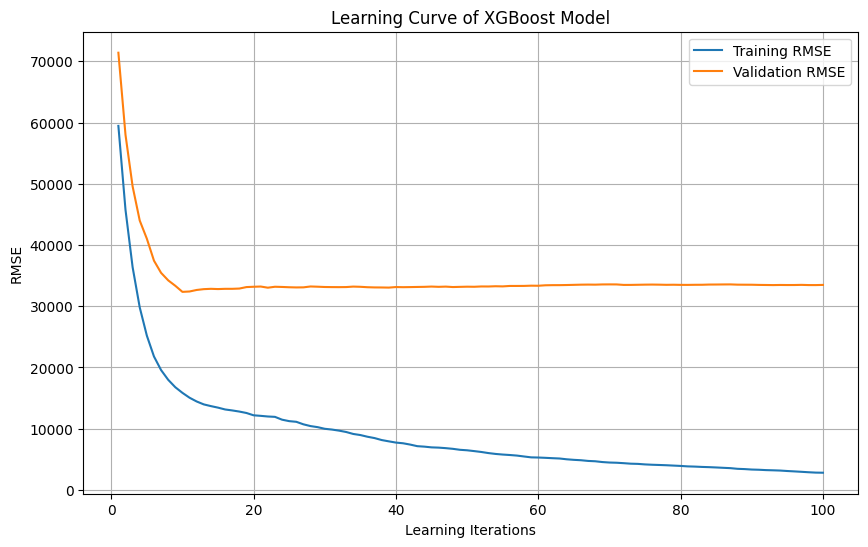

In [204]:
# 학습 과정에서의 평가 결과 가져오기
evals_result = basic_regressor.evals_result()

# 학습 및 검증 세트의 RMSE 값 추출
train_rmse = evals_result['validation_0']['rmse']
val_rmse = evals_result['validation_1']['rmse']

# 학습 라운드 (iteration)를 x축으로 설정
iterations = range(1, len(train_rmse) + 1)

# 학습 곡선 그리기
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_rmse, label='Training RMSE')
plt.plot(iterations, val_rmse, label='Validation RMSE')
plt.xlabel('Learning Iterations')
plt.ylabel('RMSE')
plt.title('Learning Curve of XGBoost Model')
plt.legend()
plt.grid()
plt.show()


In [205]:
# 테스트 세트에 대한 예측
y_pred_basic = basic_regressor.predict(X_test)
y_pred_basic.shape
print(basic_regressor.get_params)

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)>


In [206]:
print(basic_regressor.max_depth,
basic_regressor.n_estimators,
basic_regressor.learning_rate,
basic_regressor.colsample_bytree)

None None None None


In [207]:
print(basic_regressor)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [208]:
print(mae_eval(y_pred=y_pred_basic, y_test=y_test), rmse_eval(y_pred=y_pred_basic, y_test=y_test))

20570.78036708048 30114.435739739612


In [209]:
from sklearn.model_selection import GridSearchCV
# XGBoost 모델 생성
model = xgb.XGBRegressor(eval_metric='rmse')

# 파라미터 그리드 설정
param_grid = {
    "max_depth": [4, 6],
    "n_estimators": [300, 700],
    "learning_rate": [0.3, 0.01, 0.015],
    "colsample_bytree": [1.0, 0.5, 0.1]
}

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5
)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'colsample_bytree': 0.5, 'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 700}


In [210]:
regressor = xgb.XGBRegressor(eval_metric='rmse', colsample_bytree=0.5,learning_rate=0.15, max_depth=4, n_estimators=700)

In [229]:
# 학습 과정에서의 평가 결과 가져오기
tuend_evals_result = grid_search.evals_result()

# 학습 및 검증 세트의 RMSE 값 추출
train_rmse = tuend_evals_result['validation_0']['rmse']
val_rmse = tuend_evals_result['validation_1']['rmse']

# 학습 라운드 (iteration)를 x축으로 설정
iterations = range(1, len(train_rmse) + 1)

# 학습 곡선 그리기
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_rmse, label='Training RMSE')
plt.plot(iterations, val_rmse, label='Validation RMSE')
plt.xlabel('Learning Iterations')
plt.ylabel('RMSE')
plt.title('Learning Curve of XGBoost Model')
plt.legend()
plt.grid()
plt.show()


XGBoostError: No evaluation result, `eval_set` is not used during training.

In [211]:
y_pred = search.best_estimator_.predict(X_test)

In [212]:
print(mae_eval(y_pred=y_pred, y_test=y_test), rmse_eval(y_pred=y_pred, y_test=y_test))

18737.279243364726 27847.922736328474


In [213]:
regressor = search.best_estimator_

In [214]:
print(rmse_eval(y_pred=y_pred, y_test=y_test))
print(rmse_eval(y_pred=y_pred_basic, y_test=y_test))

27847.922736328474
30114.435739739612


In [215]:
# 실제 submission file용 예측해서 비교해보자.

df_test = pd.read_csv("test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [216]:
df_names= [
    'OverallQual',
    'YearBuilt',
    'YearRemodAdd',
    'TotalBsmtSF',
    '1stFlrSF',
    'GrLivArea',
    'FullBath',
    'TotRmsAbvGrd',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea']

In [217]:
df_test = df_test[df_names]
df_test.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
0,5,1961,1961,882.0,896,896,1,5,1961.0,1.0,730.0
1,6,1958,1958,1329.0,1329,1329,1,6,1958.0,1.0,312.0
2,5,1997,1998,928.0,928,1629,2,6,1997.0,2.0,482.0
3,6,1998,1998,926.0,926,1604,2,7,1998.0,2.0,470.0
4,8,1992,1992,1280.0,1280,1280,2,5,1992.0,2.0,506.0


In [218]:
df_test.isnull().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      1
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageYrBlt     78
GarageCars       1
GarageArea       1
dtype: int64

In [219]:
df_test = df_test.fillna(df_test.mean())
df_test.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [220]:
print(X_test.shape, df_test.shape)

(146, 11) (1459, 11)


In [221]:
df_test = (df_test - df_test.mean()) / df_test.std()
X_test = df_test.values


In [222]:
basic_pred = basic_regressor.predict(X_test)
tuned_pred = regressor.predict(X_test)

In [223]:
df_submit = pd.read_csv("sample_submission.csv")
df_submit.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [224]:
df_submit["SalePrice"] = basic_pred
df_basic_pred = df_submit
df_basic_pred.to_csv("basic_pred.csv", index=False)
df_basic_pred.head()

,Id,SalePrice
0,1461,122422.007812
1,1462,150282.796875
2,1463,170496.750000
3,1464,186272.937500
4,1465,184652.578125


In [225]:
df_submit["SalePrice"] = tuned_pred
df_tuned_pred = df_submit
df_tuned_pred.to_csv("tuned_pred.csv",  index=False)

In [226]:
df_tuned_pred.head()

,Id,SalePrice
0,1461,123843.906250
1,1462,146614.281250
2,1463,165654.546875
3,1464,171572.203125
4,1465,179073.515625
